# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [51]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [31]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [49]:
# I.1 Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill.
   
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [50]:
# I.2  Remova as variáveis não significantes.
    
modelo = sm.OLS(y,X)
results = modelo.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     2.534
Date:                Sat, 23 Dec 2023   Prob (F-statistic):              0.283
Time:                        20:12:20   Log-Likelihood:                -4.2858
No. Observations:                   5   AIC:                             14.57
Df Residuals:                       2   BIC:                             13.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1419      0.530     -0.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [5]:
# Considerando que o nível de significância seja de 0.05
alpha = 0.05
significant_coefs = results.pvalues[1:] < alpha

# Obter os nomes das variáveis
X_names = [col for col in tips.columns if col != "tip"]


# Imprimir as variáveis não significativas
print("\nAs variáveis não significativas que serão removidas são:")
print([variable for variable, is_significant in zip(X_names, significant_coefs) if not is_significant])




As variáveis não significativas que serão removidas são:
['total_bill', 'sex', 'smoker', 'day']


In [6]:
# Obter as colunas significativas do DataFrame original
X_significant = X[:, np.insert(significant_coefs, 0, True)]

# Ajustar o modelo apenas com as variáveis significativas
model_significant = sm.OLS(y, X_significant)
results_significant = model_significant.fit()

# Imprimir resumo estatístico do novo modelo
print(results_significant.summary())



                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 23 Dec 2023   Prob (F-statistic):                nan
Time:                        18:01:06   Log-Likelihood:                -7.4416
No. Observations:                   5   AIC:                             16.88
Df Residuals:                       4   BIC:                             16.49
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          2.6180      0.536      4.885      0.0

C:\Users\User\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Ressalta-se que var_0 é uma constante adicionada automaticamente pelo statsmodels para corresponder ao Intercepto

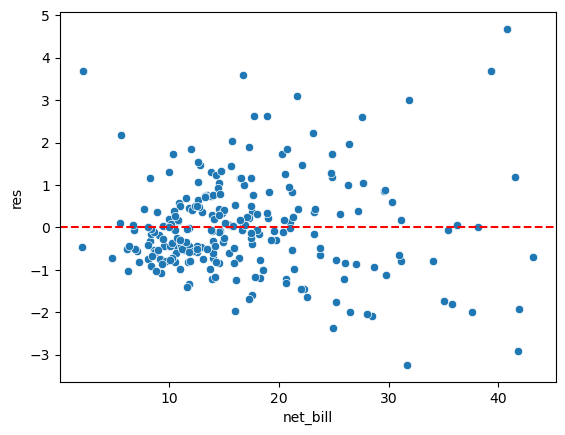

In [7]:
#I.3- Observe o gráfico de resíduos em função de net_bill
reg = smf.ols('tip ~ sex + smoker + time + net_bill + 1', data=tips).fit()
tips['res'] = reg.resid
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='sex', ylabel='res'>

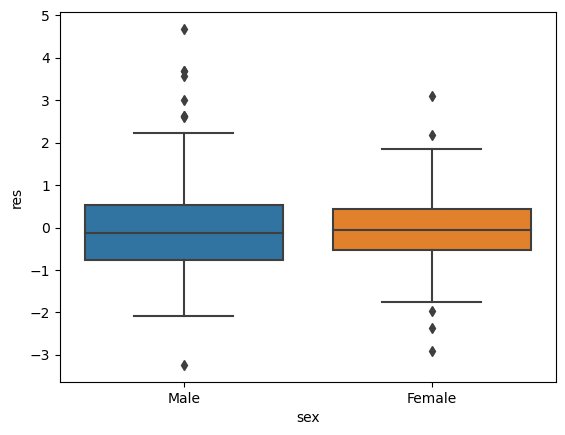

In [8]:
sns.boxplot(x = 'sex', y = 'res', data = tips)

Podemos observa no scartterplot que o modelo tende a apresentar as três características desejadas: nehum padrõa evidente, aspecto independente e variânica uniforme

In [ ]:
#I.4 - teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

#### Ajustando uma função logaritmica

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           3.53e-20
Time:                        18:02:02   Log-Likelihood:                -382.18
No. Observations:                 244   AIC:                             768.4
Df Residuals:                     242   BIC:                             775.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.31

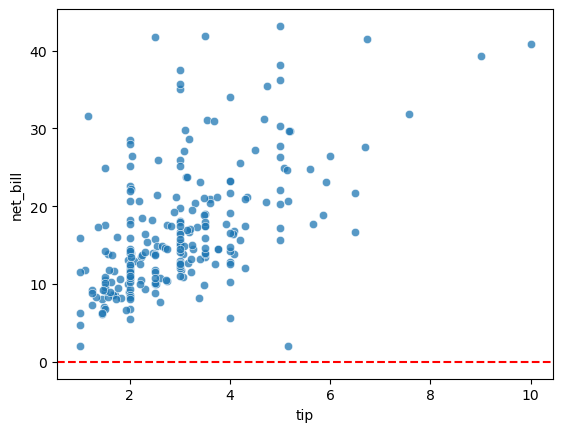

In [9]:
reg = smf.ols('tip ~ np.log(net_bill+.1)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'tip', y = 'net_bill', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

#### Ajustando um polinômio de segundo grau

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           4.96e-22
Time:                        18:02:12   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.07

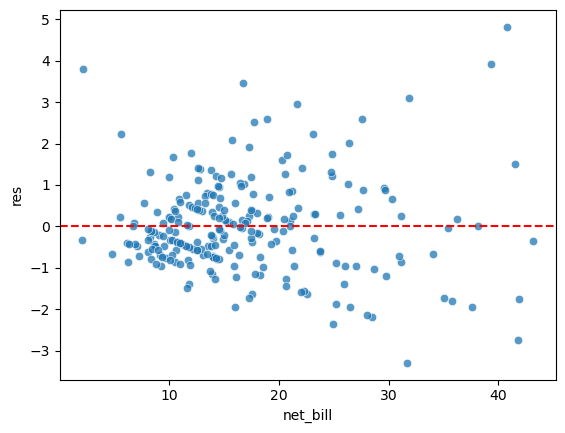

In [10]:
reg = smf.ols('tip ~ net_bill + np.power(net_bill,2)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [43]:
#-II -> 1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 1', tips)


In [44]:
#. II ->2 Remova as variáveis não significantes.
modelo = sm.OLS(y,X)
results = modelo.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           1.21e-18
Time:                        19:59:58   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

In [45]:
# Considerando que o nível de significância seja de 0.05
alpha = 0.05
significant_coefs = results.pvalues[1:] < alpha

# Obter os nomes das variáveis
X_names = [col for col in tips.columns if col != "tip"]


# Imprimir as variáveis não significativas
print("\nAs variáveis não significativas que serão removidas são:")
print([variable for variable, is_significant in zip(X_names, significant_coefs) if not is_significant])



As variáveis não significativas que serão removidas são:
['total_bill', 'sex', 'smoker']


In [46]:
# Obter as colunas significativas do DataFrame original
X_significant = X[:, np.insert(significant_coefs, 0, True)]

# Ajustar o modelo apenas com as variáveis significativas
model_significant = sm.OLS(y, X_significant)
results_significant = model_significant.fit()

# Imprimir resumo estatístico do novo modelo
print(results_significant.summary())


                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           2.60e-21
Time:                        20:01:06   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.4945      0.054      9.172      0.0

var_0 e var_1 corresponde respectivamente ao intercpetor e net_bill



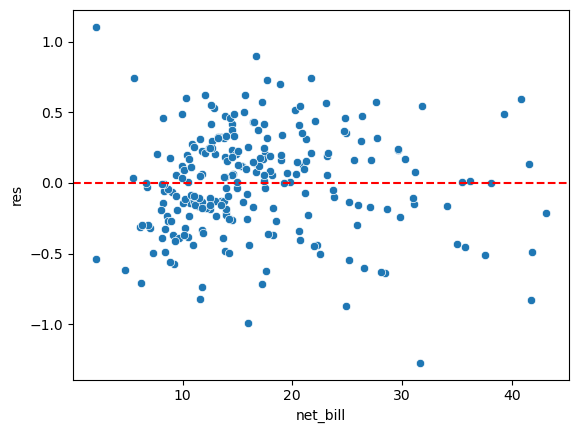

In [24]:
#. II - > Observe o gráfico de resíduos em função de net_bill

reg = smf.ols('np.log(tip) ~ sex + smoker + time + net_bill + 1', data=tips).fit()
tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [25]:
#. II -> 4 Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.


Ajuste com logarítimo

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           4.80e-22
Time:                        19:31:25   Log-Likelihood:                -96.199
No. Observations:                 244   AIC:                             196.4
Df Residuals:                     242   BIC:                             203.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

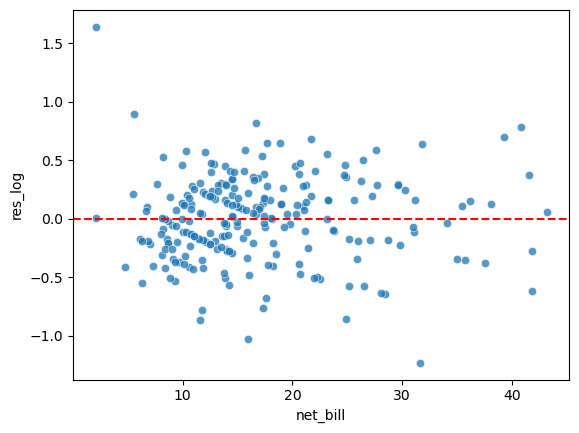

In [26]:
# Ajuste com transformação logarítmica de net_bill
reg_log = smf.ols('np.log(tip) ~ np.log(net_bill + 0.1)', data=tips).fit()
print(reg_log.summary())

# Visualização dos resíduos
tips['res_log'] = reg_log.resid
sns.scatterplot(x='net_bill', y='res_log', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


Ajuste com Polinômio

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           2.82e-22
Time:                        20:05:48   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.18

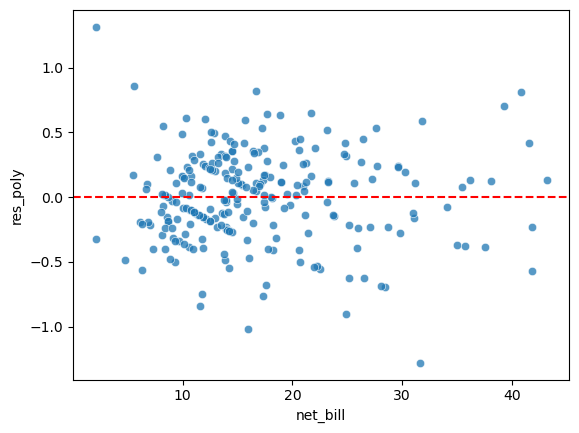

In [47]:
# Ajuste com termo polinomial de segunda ordem em net_bill
reg_poly = smf.ols('np.log(tip) ~ net_bill + np.power(net_bill, 2)', data=tips).fit()
print(reg_poly.summary())

# Visualização dos resíduos
tips['res_poly'] = reg_poly.resid
sns.scatterplot(x='net_bill', y='res_poly', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [48]:
# II -> 5 Do modelo final deste item, calcule o 𝑅2 na escala de tip (sem o log). 
#Compare com o modelo do item 1. 
# Qual tem melhor coeficiente de determinação?

# Adicionar as previsões do modelo ao DataFrame
tips['pred_poly'] = reg_poly.fittedvalues

# Calcular a correlação entre as previsões e tip_pct
r = tips[['pred_poly', 'tip']].corr().iloc[0, 1]

# Calcular o R-quadrado
R_quadrado = r**2

print(f"O R-quadrado na escala original de tip: {R_quadrado:.2f}")



O R-quadrado na escala original de tip: 0.32


Escolheria o modelo do item 1, pois o  R-squared é igual 0.717

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [86]:
prev_renda = pd.read_csv('previsao_de_renda.csv')
prev_renda.isnull().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [87]:
prev_renda = prev_renda.dropna()

In [88]:
prev_renda.isnull().sum()

Unnamed: 0               0
data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

1.Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.


In [89]:
reg_renda = smf.ols('renda ~ tempo_emprego + 1', prev_renda).fit()

reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:20:08   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?


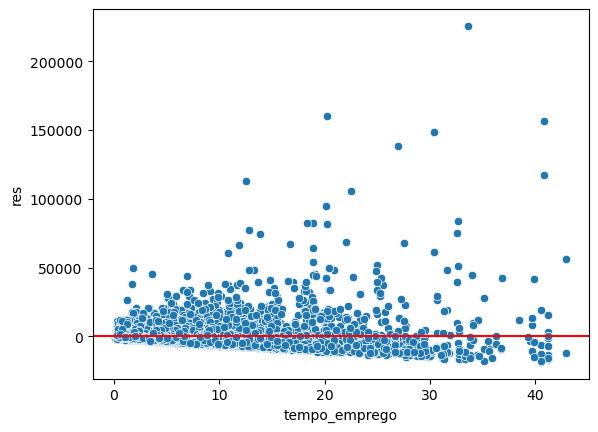

In [94]:
prev_renda['res'] = reg_renda.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data=prev_renda)
plt.axhline(y=0, color='r', linestyle='-')

O gráfico de resíduos mostra um padrão de distribuição em torno do zero, indicando que o modelo pode estar capturando bem a relação entre a variável dependente e a variável independente. No entanto, a concentração dos resíduos em torno de zero pode sugerir a presença de padrões ou estruturas não modeladas. Para aprimorar a modelagem, será realizado ajuste no modelo.

### Ajuste log em tempo_emprego

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1289.
Date:                Sat, 23 Dec 2023   Prob (F-statistic):          1.29e-268
Time:                        22:01:24   Log-Likelihood:            -1.3001e+05
No. Observations:               12427   AIC:                         2.600e+05
Df Residuals:                   12425   BIC:                         2.600e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

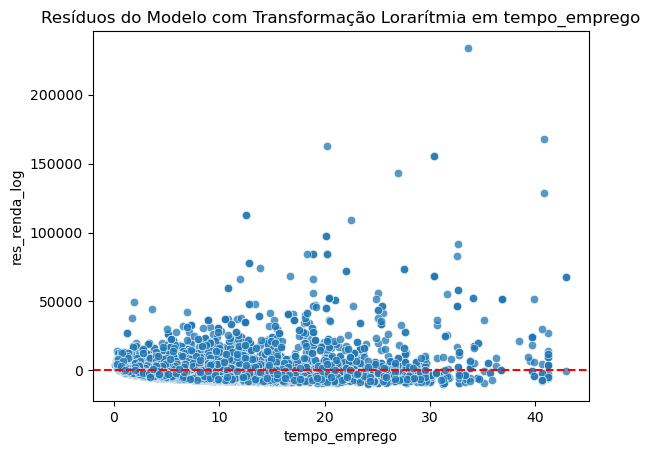

In [101]:
# Ajuste com transformação logarítmica de tempo_emprego
reg_renda_log = smf.ols('renda ~ np.log(tempo_emprego + 0.1)', data=prev_renda).fit()
print(reg_renda_log.summary())

# Visualização dos resíduos
prev_renda['res_renda_log'] = reg_renda_log.resid
sns.scatterplot(x='tempo_emprego', y='res_renda_log', data=prev_renda, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos do Modelo com Transformação Lorarítmia em tempo_emprego')
plt.show()


                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     2117.
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:01:50   Log-Likelihood:                -15338.
No. Observations:               12427   AIC:                         3.068e+04
Df Residuals:                   12425   BIC:                         3.070e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

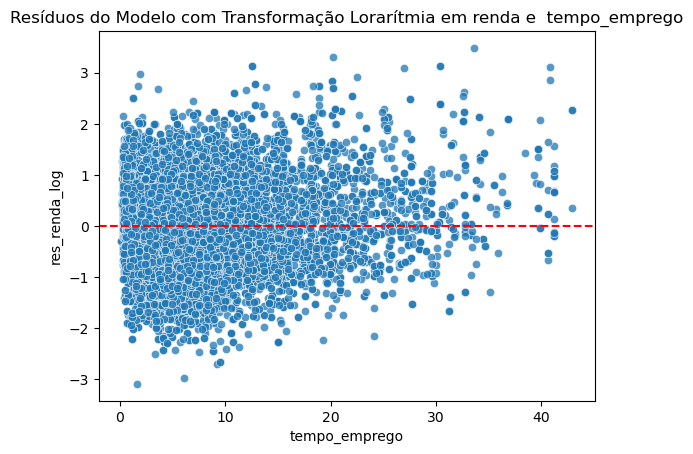

In [102]:
# Ajuste com transformação logarítmica de tempo_emprego
reg_renda_log = smf.ols('np.log(renda) ~ np.log(tempo_emprego + 0.1)', data=prev_renda).fit()
print(reg_renda_log.summary())

# Visualização dos resíduos
prev_renda['res_renda_log'] = reg_renda_log.resid
sns.scatterplot(x='tempo_emprego', y='res_renda_log', data=prev_renda, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos do Modelo com Transformação Lorarítmia em renda e  tempo_emprego')
plt.show()


### Ajuste polinomial

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:01:57   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12424   BIC:                         2.592e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

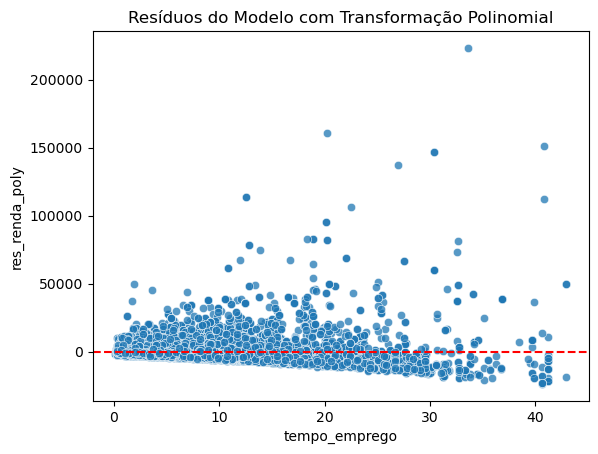

In [103]:
reg_renda_poly = sm.OLS.from_formula('renda ~ tempo_emprego + np.power(tempo_emprego, 2) + 1', data=prev_renda).fit()

# Imprima o resumo do modelo
print(reg_renda_poly.summary())

# Visualização dos resíduos
prev_renda['res_renda_poly'] = reg_renda_poly.resid
sns.scatterplot(x='tempo_emprego', y='res_renda_poly', data=prev_renda, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos do Modelo com Transformação Polinomial')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     1831.
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:05:57   Log-Likelihood:            -1.2977e+05
No. Observations:               12427   AIC:                         2.596e+05
Df Residuals:                   12425   BIC:                         2.596e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1008

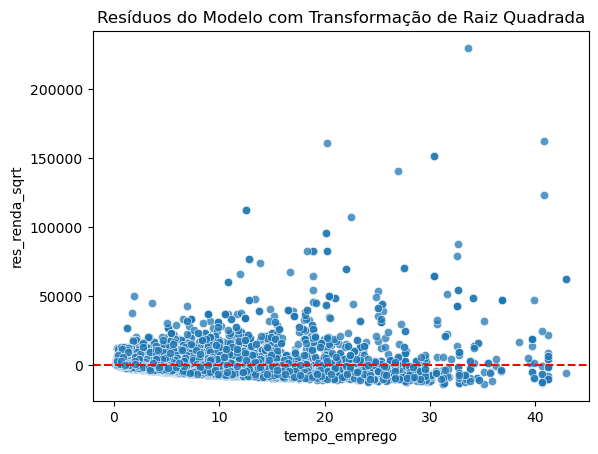

In [106]:
reg_renda_sqrt = sm.OLS.from_formula('renda ~ np.sqrt(tempo_emprego) + 1', data=prev_renda).fit()

# Imprima o resumo do modelo
print(reg_renda_sqrt.summary())

# Visualização dos resíduos
prev_renda['res_renda_sqrt'] = reg_renda_sqrt.resid
sns.scatterplot(x= 'tempo_emprego', y='res_renda_sqrt', data=prev_renda, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos do Modelo com Transformação de Raiz Quadrada')
plt.show()

Na tentativa de encontrar um R-quadrado melhor que o do modelo linear que foi de 0.148. Foi tentado ajustes: 
* Log em tempo-emprego com R-quadrado = 0.094
* Log em renda e tempo_emprego com R-quadrado = 0.146
* Polinomial em tempo_emprego com R-quadrado = 0.152
* Rai quadrada em tempo_emprego com R-quadrado = 0.128

Apesar dos resultados pouco significantes, observou-se que o gráfico que apresentou uma melhoria quanto a distribuição dos resídudos foi o relativo ao ajuste Log em reda e tempo_emprego. O que mostra que o modelo pode melhorar ainda mais, há de se pensar na necessidade de incluir mais variáveis indepedentes

3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.


In [113]:
reg_multipla_renda = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia + tempo_emprego + 1', prev_renda).fit()

reg_multipla_renda.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:24:54   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
sexo[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
posse_de_veiculo[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
posse_de_imovel[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
tipo_renda[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
educacao[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
estado_civil[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
tipo_residencia[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
qtd_filhos                       -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                               42.0025      8.517      4.931      0.000      25.307      58.698
qt_pessoas_residencia             1269.8493   1145.868      1.108      0.268    -976.229    3515.928
tempo_emprego                      554.7551     11.044     50.230      0.000     533.107     576.404
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:             

4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros


In [133]:
result_summary = reg_multipla_renda.summary()

# Obtendo a tabela de coeficientes
coef_table = result_summary.tables[1]

# Converendo a tabela para um DataFrame pandas para facilitar a manipulação
coef_df = pd.DataFrame(coef_table.data[1:], columns=coef_table.data[0])

# Extraia os valores da coluna P>|t|
p_values = coef_df['P>|t|'].astype(float)

# Defina o nível de significância
alpha = 0.05

# Identificando as variáveis significantes
variaveis_significantes = coef_df.loc[p_values < alpha, '']

# Identificando as variáveis insignificantes
variaveis_insignificantes = coef_df.loc[p_values > alpha, '']


print("Variáveis significantes:")
print(variaveis_significantes)

print("\nVariáveis insignificantes:")
print(variaveis_insignificantes)


Variáveis significantes:
0                    Intercept
1                    sexo[T.M]
3      posse_de_imovel[T.True]
5     tipo_renda[T.Empresário]
22                       idade
24               tempo_emprego
Name: , dtype: object

Variáveis insignificantes:
2             posse_de_veiculo[T.True]
4               tipo_renda[T.Bolsista]
6            tipo_renda[T.Pensionista]
7       tipo_renda[T.Servidor público]
8            educacao[T.Pós graduação]
9               educacao[T.Secundário]
10       educacao[T.Superior completo]
11     educacao[T.Superior incompleto]
12            estado_civil[T.Separado]
13            estado_civil[T.Solteiro]
14               estado_civil[T.União]
15               estado_civil[T.Viúvo]
16             tipo_residencia[T.Casa]
17      tipo_residencia[T.Com os pais]
18      tipo_residencia[T.Comunitário]
19          tipo_residencia[T.Estúdio]
20    tipo_residencia[T.Governamental]
21                          qtd_filhos
23               qt_pessoas_residenci

### Modelo ajustado sem as variáveis insignificantes

In [141]:
reg_multipla_ajustado_renda = smf.ols('renda ~ sexo + posse_de_imovel + tipo_renda + idade + tempo_emprego + 1', prev_renda).fit()

reg_multipla_ajustado_renda.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     528.6
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:55:38   Log-Likelihood:            -1.2881e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12418   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -2481.0546    336.397     -7.375      0.000   -3140.445   -1821.664
sexo[T.M]                       6091.0534    145.795     41.778      0.000    5805.273    6376.834
posse_de_imovel[T.True]          386.3605    145.543      2.655      0.008     101.074     671.647
tipo_renda[T.Bolsista]          -893.9027   2563.590     -0.349      0.727   -5918.936    4131.131
tipo_renda[T.Empresário]         853.0427    157.504      5.416      0.000     544.311    1161.775
tipo_renda[T.Pensionista]      -2579.2216   2562.352     -1.007      0.314   -7601.828    2443.385
tipo_renda[T.Servidor público]   249.8860    234.926      1.064      0.287    -210.606     710.378
idade                             38.7817      7.838      4.948      0.000      23.419      54.145
tempo_emprego                    554.9459     11.018     50.367      0.000     533.349     576.543
==============================================================================
Omnibus:                    17545.490   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9801698.147
Skew:                           8.106   Prob(JB):                         0.00
Kurtosis:                     139.627   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Análise dos parâmetros

Ambos os modelos apresentam R-squared próximos, indicando que eles explicam uma proporção semelhante da variabilidade nos dados. 

Comparando os dois modelos, o modelo com variáveis significativas parece ser mais simples e ainda explica uma quantidade semelhante de variação nos dados. Isso sugere que as variáveis removidas do segundo modelo não contribuíram significativamente para explicar a variação na renda.

5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

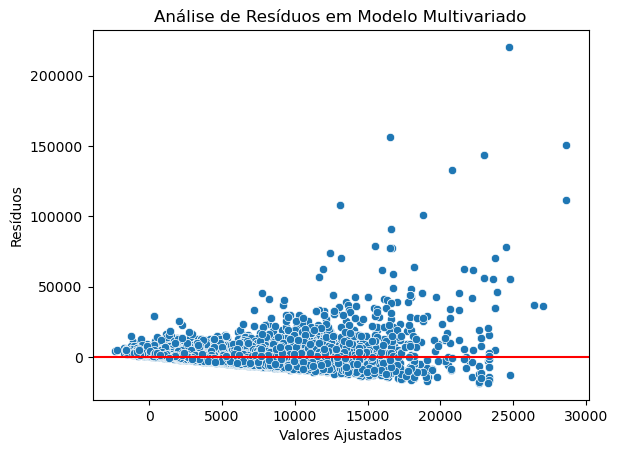

In [146]:
prev_renda['res_multip'] = reg_multipla_renda.resid

# Separando os termos da fórmula para o gráfico de dispersão
formula_terms = ['sexo', 'posse_de_imovel', 'tipo_renda', 'idade', 'tempo_emprego']

# Concatenando os termos para formar a fórmula
formula = ' + '.join(formula_terms)

# Gráfico de dispersão dos resíduos
sns.scatterplot(x=reg_multipla_renda.fittedvalues, y=reg_multipla_renda.resid)
plt.title('Análise de Resíduos em Modelo Multivariado')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


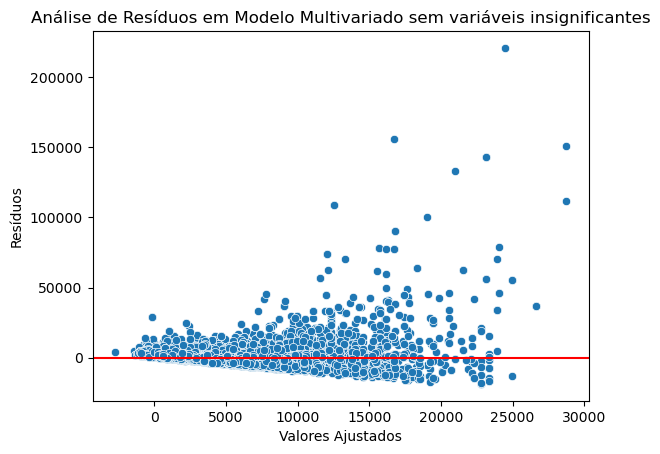

In [147]:
prev_renda['res_multip_var_sig'] = reg_multipla_ajustado_renda.resid

# Separando os termos da fórmula para o gráfico de dispersão
formula_terms = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
                  'estado_civil', 'tipo_residencia', 'idade', 'qt_pessoas_residencia', 'tempo_emprego']

# Concatenando os termos para formar a fórmula
formula = ' + '.join(formula_terms)

# Gráfico de dispersão dos resíduos
sns.scatterplot(x=reg_multipla_ajustado_renda.fittedvalues, y=reg_multipla_ajustado_renda.resid)
plt.title('Análise de Resíduos em Modelo Multivariado sem variáveis insignificantes')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


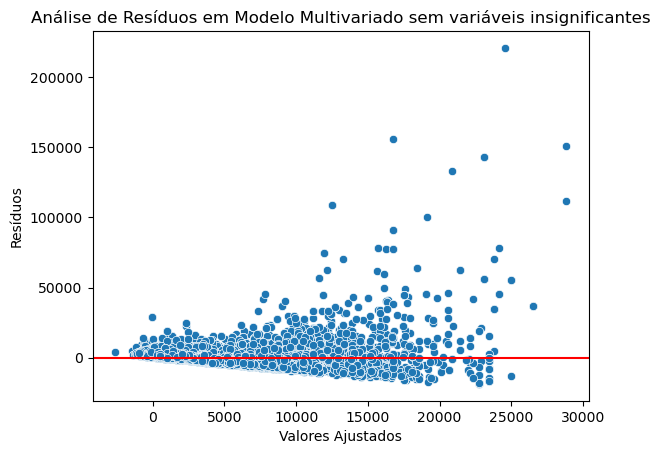

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     470.0
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:26:33   Log-Likelihood:            -1.2881e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12417   BIC:                         2.577e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [151]:

# Ajuste inicial do modelo
formula = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda + idade + tempo_emprego'
reg_multipla_ajustado_renda = smf.ols(formula, data=prev_renda).fit()

# Adicione uma coluna para os resíduos
prev_renda['res_multip_var_sig'] = reg_multipla_ajustado_renda.resid

# Gráfico de dispersão dos resíduos
sns.scatterplot(x=reg_multipla_ajustado_renda.fittedvalues, y=reg_multipla_ajustado_renda.resid)
plt.title('Análise de Resíduos em Modelo Multivariado sem variáveis insignificantes')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Exibir resumo estatístico do modelo ajustado
print(reg_multipla_ajustado_renda.summary())


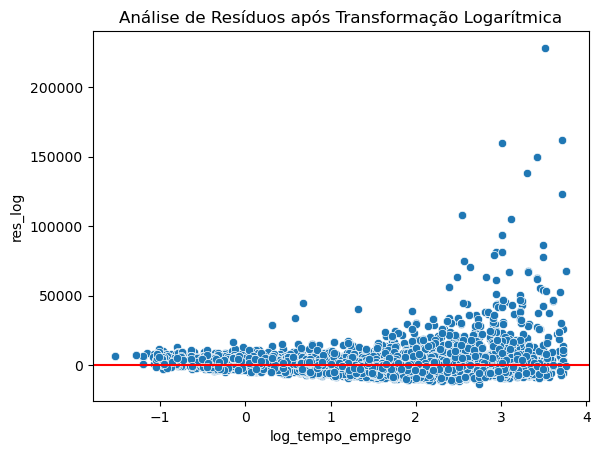

In [152]:
import numpy as np

prev_renda['log_tempo_emprego'] = np.log(prev_renda['tempo_emprego'] + 0.1)

reg_renda_log = smf.ols('renda ~ log_tempo_emprego + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia', prev_renda).fit()

prev_renda['res_log'] = reg_renda_log.resid

sns.scatterplot(x='log_tempo_emprego', y='res_log', data=prev_renda)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Análise de Resíduos após Transformação Logarítmica')
plt.show()


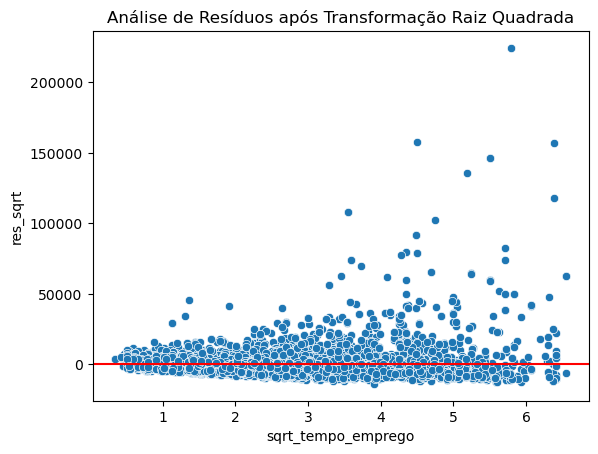

In [153]:
prev_renda['sqrt_tempo_emprego'] = np.sqrt(prev_renda['tempo_emprego'])

reg_renda_sqrt = smf.ols('renda ~ sqrt_tempo_emprego + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia', prev_renda).fit()

prev_renda['res_sqrt'] = reg_renda_sqrt.resid

sns.scatterplot(x='sqrt_tempo_emprego', y='res_sqrt', data=prev_renda)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Análise de Resíduos após Transformação Raiz Quadrada')
plt.show()


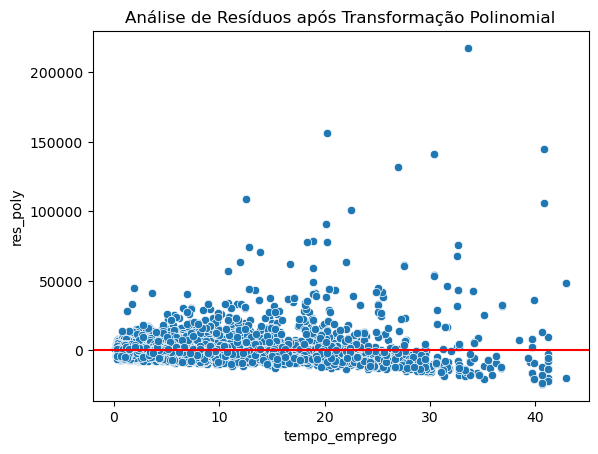

In [154]:
prev_renda['tempo_emprego_squared'] = prev_renda['tempo_emprego']**2

reg_renda_poly = smf.ols('renda ~ tempo_emprego + tempo_emprego_squared + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia', prev_renda).fit()

prev_renda['res_poly'] = reg_renda_poly.resid

sns.scatterplot(x='tempo_emprego', y='res_poly', data=prev_renda)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Análise de Resíduos após Transformação Polinomial')
plt.show()


### Comentários

Concluindo a análise dos modelos de regressão desenvolvidos para a variável de resposta "renda", observamos que, apesar das diversas tentativas de aprimoramento por meio de transformações variadas, os gráficos de resíduos mantiveram uma forma consistente. Essa forma, caracterizada por uma correlação negativa persistente e uma distribuição concentrada em torno de zero, não apresentou melhorias significativas com as transformações aplicadas.

As tentativas de melhoria incluíram a seleção de variáveis significativas com base em testes de significância, a remoção de variáveis não significativas, e a aplicação de transformações como logarítmica, raiz quadrada e polinomial de segunda ordem. Apesar desses esforços, o padrão dos resíduos permaneceu relativamente inalterado.

A consistência no padrão dos resíduos sugere que o modelo, embora bem ajustado para capturar a relação entre as variáveis independentes e a variável de resposta, pode estar atingindo um limite em termos de melhoria preditiva com as variáveis disponíveis.
